In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
# covert the data file into a dataframe so it's easy to manupilate
covid = pd.read_csv("../data/covid_19_clean_data.csv")
covid.head()

,Unnamed: 0,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,0,2020-01-22,China,1.0,0.0,0.0
1,1,2020-01-22,China,14.0,0.0,0.0
2,2,2020-01-22,China,6.0,0.0,0.0
3,3,2020-01-22,China,1.0,0.0,0.0
4,4,2020-01-22,China,0.0,0.0,0.0


In [29]:
country_group_data = covid.groupby(["Country/Region"], as_index=False).agg({'Confirmed':'sum', 'Recovered':'sum', 'Deaths':'sum'})
country_group_data["Active"] = country_group_data["Confirmed"] - country_group_data["Recovered"] - country_group_data["Deaths"] 
country_group_data.head()

,Country/Region,Confirmed,Recovered,Deaths,Active
0,Afghanistan,4134817.0,2463817.0,128968.0,1542032.0
1,Albania,704767.0,398544.0,20902.0,285321.0
2,Algeria,3583765.0,2438290.0,162118.0,983357.0
3,Andorra,161490.0,122145.0,8482.0,30863.0
4,Angola,164497.0,60164.0,6959.0,97374.0


In [30]:
data =  pd.DataFrame(country_group_data,  
                  columns = ['Confirmed', 'Recovered',  
                             'Deaths', 'Active']) 
data.head()

,Confirmed,Recovered,Deaths,Active
0,4134817.0,2463817.0,128968.0,1542032.0
1,704767.0,398544.0,20902.0,285321.0
2,3583765.0,2438290.0,162118.0,983357.0
3,161490.0,122145.0,8482.0,30863.0
4,164497.0,60164.0,6959.0,97374.0


In [32]:
# creat correlation map
data.corr()

,Confirmed,Recovered,Deaths,Active
Confirmed,1.000000,0.907989,0.928581,0.922416
Recovered,0.907989,1.000000,0.791640,0.676073
Deaths,0.928581,0.791640,1.000000,0.895096
Active,0.922416,0.676073,0.895096,1.000000


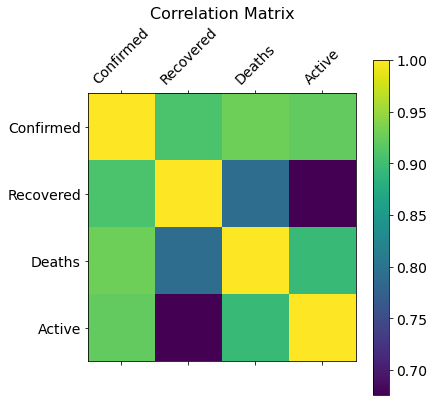

In [37]:
f = plt.figure(figsize=(6, 6))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);